<h1>Atividade 02 - melhorar o desempenho de RP em conjunto de dados existentes</h1>
<p>A atividade 02 visa trabalhar com um conjunto de dados pré-construído, onde as opções que o desenvolvedor tem, são de aplicar as técnicas de pré-processamento abaixo relacionadas:</p>
<ul><li>Seleção</li>
<li>Limpeza</li>
<li>Codificação</li>
<li>Enriquecimento</li>
<li>Normalização</li>
<li>Construção de Atributos</li>
<li>Correção de Prevalência</li>
<li>Partição do Conjunto de Dados</li>
</ul>
<p>Busque uma base de dados na UCI Machine Learning que seja indicada para problemas de classificação. (<a target="_blank" href="https://archive.ics.uci.edu/datasets">https://archive.ics.uci.edu/datasets</a>)</p>
<p>Para esse exemplo, vou usar a base de qualidade de vinhos (https://archive.ics.uci.edu/dataset/186/wine+quality)</p>


Baixando o dataset direto do site da UCI.


In [123]:
#
# base de dados disponível na UCI Machine Learning - https://archive.ics.uci.edu/dataset/186/wine+quality

import requests, zipfile, io
from io import BytesIO
import numpy as np
import pandas as pd

r = requests.get('https://archive.ics.uci.edu/static/public/186/wine+quality.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.namelist()
dadosfp = z.open('winequality-white.csv')
dados = dadosfp.read()
winequality_df = pd.read_csv(io.BytesIO(dados), sep=';')
print(winequality_df.head())

winequality_df.describe()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<h2>Hora de realizar os tratamentos<h2>
<p>no exemplo, iremos normalizar as colunas, remover a coluna de identificação e separar a classe dos atributos.</p>

In [124]:
# Tipos das colunas
winequality_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [125]:
# Verificação de dados ausentes
winequality_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [126]:
# Verificação de colunas com dados únicos
winequality_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [127]:
# Verificação e remoção de duplicados
print("Número de linhas duplicadas: ", winequality_df.duplicated().sum())

winequality_df_no_dups = winequality_df.drop_duplicates()
print("Total de padrões: ", winequality_df.shape[0])
print("Total de padrões após remoção de duplicados: ", winequality_df_no_dups.shape[0])

Número de linhas duplicadas:  937
Total de padrões:  4898
Total de padrões após remoção de duplicados:  3961


In [128]:
# verificação de valores com baixa representação ou ocorrência
num_linhas = X.shape[0]
cols = []
for c in X.columns:
    num_unicos = len( X[c].unique() )
    percentage = float(num_unicos) / num_linhas * 100
    if percentage < 1:
        print('%s, %d, %.1f%%' % (c, num_unicos, percentage))
        cols.append(c)

for i in range(0,len(cols)-1):
    cc = cols[i]
    print(cc)
    df1 = oil1[ [cc,'target'] ].value_counts()
    print( df1.unstack(level=-1) )

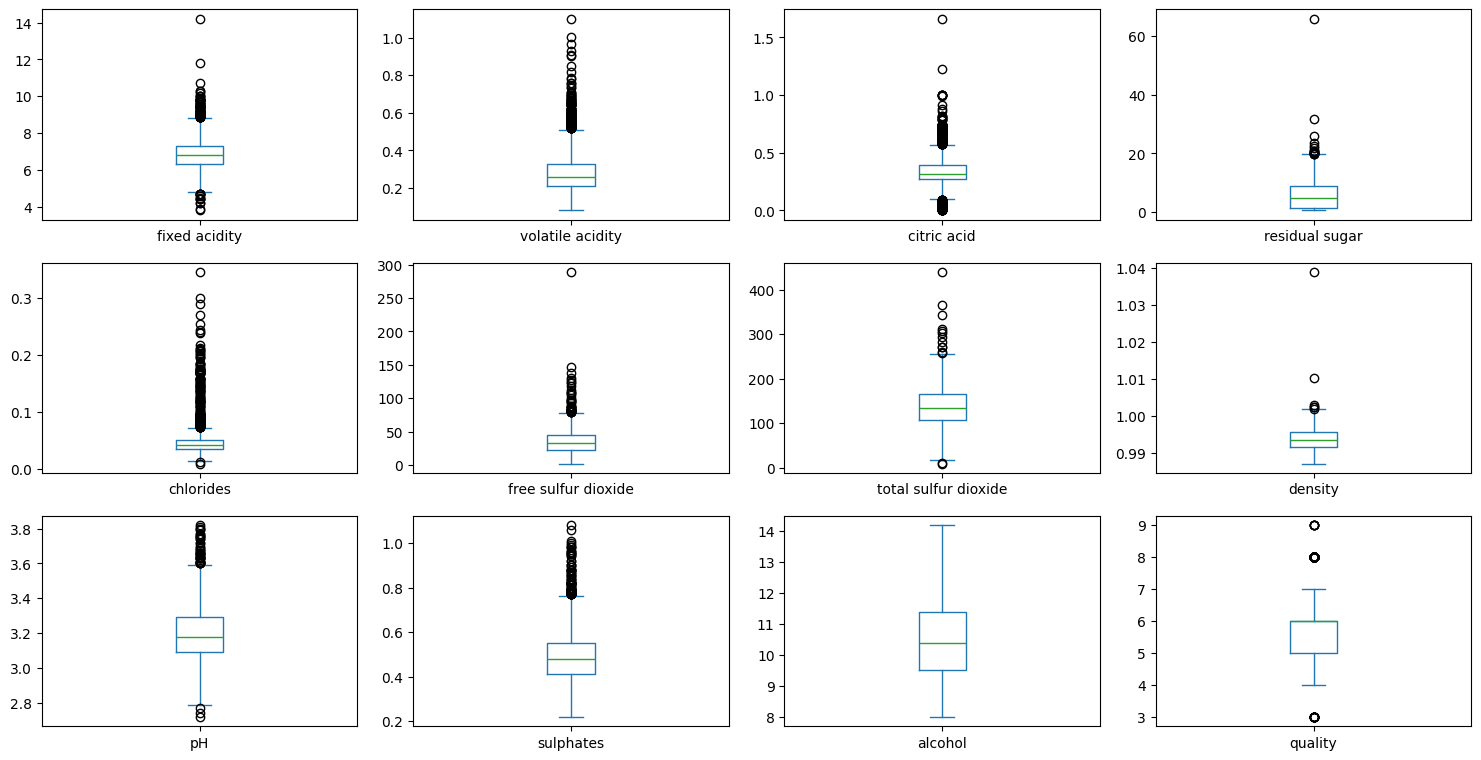

Total de linhas que contem pelo menos um outlier: 341
Total de padrões com outilers:  3961
Total de padrões após remoção de outilers:  3620


In [129]:
from scipy.stats import zscore

# Buscaa por outliers

winequality_df_no_dups.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

z_scores = winequality_df_no_dups.select_dtypes(include='number').apply(zscore)
outliers = (abs(z_scores) > 3)  # Z-score > 3 considered outlier

print("Total de linhas que contem pelo menos um outlier:", np.sum(np.any(outliers, axis=1)))

winequality_df_no_dups_no_outliers = winequality_df_no_dups[(~outliers).all(axis=1)]
print("Total de padrões com outilers: ", winequality_df_no_dups.shape[0])
print("Total de padrões após remoção de outilers: ", winequality_df_no_dups_no_outliers.shape[0])

In [130]:
X = winequality_df_no_dups_no_outliers.drop('quality', axis=1)
print(X.head())
Y = winequality_df_no_dups_no_outliers['quality']
Y_orig = winequality_df['quality']
print(Y.unique())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  
1      9.5  
2     10.1  
3      9.9  
6      9.6  
9     11.0  
[6 5 7 8

Na próxima seção que deverão ser realizada as tentativas de tratamento de dados, visando a melhoria no desempenho do classificador (SVM).

In [131]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
import pandas as pd

X_orig = winequality_df.drop('quality', axis=1)
print(X_orig.head())

print(Y_orig.unique() )

# normalização min-max
X = pd.DataFrame( minmax_scale(X) )

print(X_orig.head())
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
[6 5 7 8

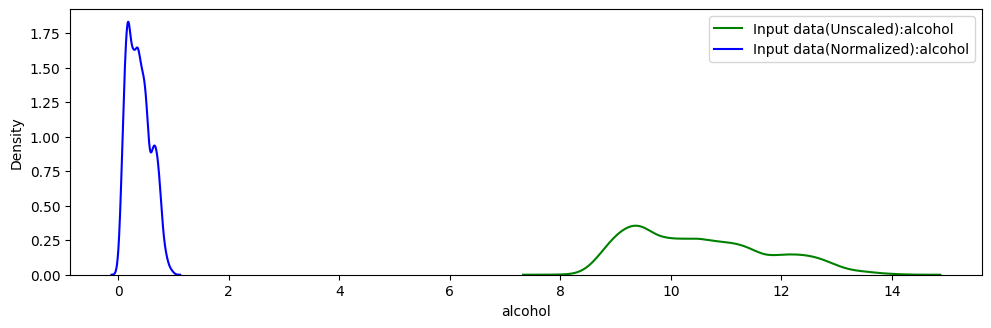

In [132]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
import scipy.stats as scs
import matplotlib.pyplot as plt

df_data_normalized = X.copy()
df_data_normalized = df_data_normalized.rename(columns={10: 'alcohol'})
plt.figure(figsize = (40,20))
for idx, col in enumerate(list(['alcohol'])):
    plt.subplot(5,3,idx + 1)
    sns.kdeplot(winequality_df[col], color = 'g',label = f"Input data(Unscaled):{col}")
    sns.kdeplot(df_data_normalized[col],color = 'b', label = f"Input data(Normalized):{col}" )    
    plt.legend()
plt.show()

A próxima seção trata da construção do modelo, dos testes e das métricas da matriz de confusão.

In [133]:
print("Train:", y_train.value_counts())
print("Test:", y_test.value_counts())

Train: quality
6    1341
5     881
7     516
4     115
8      98
3      15
9       4
Name: count, dtype: int64
Test: quality
6    447
5    294
7    173
4     38
8     33
3      5
9      1
Name: count, dtype: int64


In [134]:
print(X_orig.shape)
print(Y_orig.shape)

(4898, 11)
(4898,)


In [135]:
from sklearn.model_selection import train_test_split
import numpy as np

# com os dados originais
X_oring_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig,
                      Y_orig, test_size=0.25, stratify=Y_orig,random_state=10)

# com os dados tratados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                    stratify=Y,random_state=10)

Treina o modelo com base nos dados originais (SVM).

In [136]:

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo_orig = treinador.fit(X_oring_train, y_orig_train)

# predição com os mesmos dados usados para treinar
y_orig_pred = modelo_orig.predict(X_oring_train)
cm_orig_train = confusion_matrix(y_orig_train, y_orig_pred)
print('Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO')
print(cm_orig_train)
print(classification_report(y_orig_train, y_orig_pred, zero_division=0))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_orig_pred = modelo_orig.predict(X_orig_test)
cm_orig_test = confusion_matrix(y_orig_test, y2_orig_pred)
print(cm_orig_test)
print(classification_report(y_orig_test, y2_orig_pred, zero_division=0))


Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO
[[   1    0    3   11    0    0    0]
 [   0    0    6  116    0    0    0]
 [   0    0   92 1001    0    0    0]
 [   0    0   93 1555    0    0    0]
 [   0    0    7  653    0    0    0]
 [   0    0    3  128    0    0    0]
 [   0    0    0    4    0    0    0]]
              precision    recall  f1-score   support

           3       1.00      0.07      0.12        15
           4       0.00      0.00      0.00       122
           5       0.45      0.08      0.14      1093
           6       0.45      0.94      0.61      1648
           7       0.00      0.00      0.00       660
           8       0.00      0.00      0.00       131
           9       0.00      0.00      0.00         4

    accuracy                           0.45      3673
   macro avg       0.27      0.16      0.12      3673
weighted avg       0.34      0.45      0.32      3673

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[  0  

Como os dados ficam após os processos de tratamento dos dados?

In [137]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo = treinador.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred, zero_division=0))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred, zero_division=0))


Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[   3   50   35    1    0]
 [   0  487  299    3    0]
 [   0  194 1009   43    0]
 [   0   13  350  137    0]
 [   0    1   61   29    0]]
              precision    recall  f1-score   support

           4       1.00      0.03      0.07        89
           5       0.65      0.62      0.63       789
           6       0.58      0.81      0.67      1246
           7       0.64      0.27      0.38       500
           8       0.00      0.00      0.00        91

    accuracy                           0.60      2715
   macro avg       0.57      0.35      0.35      2715
weighted avg       0.61      0.60      0.57      2715

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[  1  20   8   0   0]
 [  0 149 114   0   0]
 [  0  77 317  21   0]
 [  0   6 129  32   0]
 [  0   0  19  12   0]]
              precision    recall  f1-score   support

           4       1.00      0.03      0.07        29
           5     